In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
from prettytable import PrettyTable

func - функция

func_der1 - 1 производная

func_der2 - 2 производная

der - численный расчет 1 производной

der2 - численный расчет 2 производной

left - левая граница диапазона

right - правая граница диапазона

e - точность

In [2]:
def func(x):
    return x + 1 / (x ** 2)

def func_der1(x):
    return 1 - (2 / x ** 3)

def func_der2(x):
    return (6 / x ** 4)

def der(f, x, d):
    return (f(x + d) - f(x - d)) / (2 * d)

def der2(f, x, d):
    return (der(f, x + d, d) - der(f, x - d, d)) / (2 * d)

left_border = 1
right_border = 2
eps_global = 1e-6

In [3]:
def plot_f(f, x_start, x_stop, num_samples = 1000):
    x = np.linspace(x_start, x_stop, num_samples)
    y = f(x)
    
    plt.plot(x, y, label="f(x)")
    plt.grid()
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')

Построим график выбранной функции

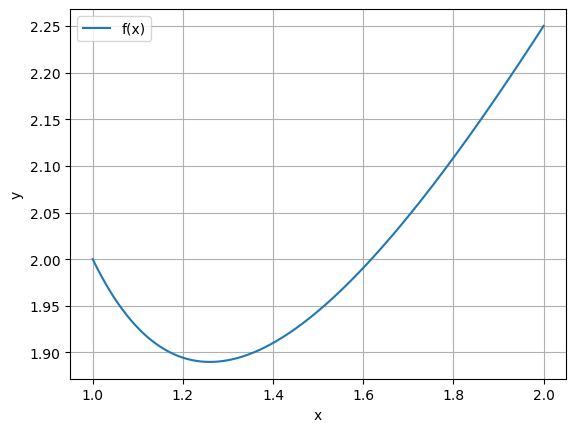

In [4]:
plot_f(func, left_border, right_border)

## Метод перебора

In [5]:
def brute_force(f, a, b, e):
    N = int(np.ceil(1.0 / e)) + 1
    x = np.linspace(a, b, N)
    y = f(x)
    min_indx = np.argmin(y)
    min_x = x[min_indx]
    
    return min_x, N

In [6]:
if (eps_global >= 1e-8):    
    x_min, count = brute_force(func, left_border, right_border, eps_global)
    print("Перебор f_min(x) =", x_min, "\nnumber of calculations f =", count)

Перебор f_min(x) = 1.259921 
number of calculations f = 1000001


## Метод поразрядного поиска

In [7]:
def bitwise(f, a, b, e):
    step = (b - a) / 4
    x_last = a
    y_last = f(a)
    
    n = 1
    
    even = True

    while step >= e:
        if even:
            while True:
                x = min(x_last + step, b)
                y = f(x)
                n += 1
                if y > y_last or x == b:
                    y_last = y
                    x_last = x
                    b = x
                    break
                y_last = y
                x_last = x
        else:
            while True:
                x = max(a, x_last - step)
                y = f(x)
                n += 1
                if y > y_last or x == a:
                    y_last = y
                    x_last = x
                    a = x
                    break
                y_last = y
                x_last = x
        
        step /= 4
        even = not even

    return x, n
        

In [8]:
x_min, count = bitwise(func, left_border, right_border, eps_global)
print("Поразрядный поиск f_min(x) =", x_min, "\nnumber of calculations f =", count)

Поразрядный поиск f_min(x) = 1.2599258422851562 
number of calculations f = 44


## Метод дихотомии

In [9]:
def dichotomy(f, a, b, e, delta):
    
    n = 0

    while abs(b - a) > e:
        x1 = (a + b) / 2 - delta
        x2 = (a + b) / 2 + delta
        
        y1 = f(x1)
        y2 = f(x2)
        n += 2
        
        if y1 <= y2:
            b = x2
        else:
            a = x1
            
    return (a + b) / 2, n

In [10]:
x_min, count = dichotomy(func, left_border, right_border, eps_global, eps_global/1000)
print("Дихотомия f_min(x) =", x_min, "\nnumber of calculations f =", count)

Дихотомия f_min(x) = 1.2599205975565746 
number of calculations f = 40


## Метод золотого сечения

In [11]:
def golden_ratio(f, a, b, e):
    t = (np.sqrt(5) - 1) / 2

    x1 = a + (b - a) * (1 - t)
    x2 = a + (b - a) * t

    y1 = f(x1)
    y2 = f(x2)

    n = 2

    while (b - a) > e:
        #print("a={0} b={1} x1={2} y1={3} x2={4} y2={5}\n".format(a,b,x1,y1,x2,y2))
        n += 1
        if y1 <= y2:
            b = x2
            x2 = x1
            y2 = y1
            x1 = b - t*(b-a) # a + b - x2
            y1 = f(x1)
        else:
            a = x1
            x1 = x2
            y1 = y2
            x2 = a + t*(b-a) # a + b - x1
            y2 = f(x2)

    return (a + b) / 2, n

In [12]:
x_min, count = golden_ratio(func, left_border, right_border, eps_global)
print("Золотое сечение f_min(x) =", x_min, "\nnumber of calculations f =", count)

Золотое сечение f_min(x) = 1.2599208983616972 
number of calculations f = 31


## Метод парабол

In [13]:
def parabola(f, a, b, e):

    t = (np.sqrt(5) - 1) / 2

    y_a = f(a)
    y_b = f(b)
 
    x1 = a + (b - a) * (1 - t)
    x2 = a + (b - a) * t

    y1 = f(x1)
    y2 = f(x2)
    
    n = 4
    
    # Начальный поиск точек
    while abs(b - a) > e:
        if (y_a >= y1 and y1 <= y2) or (y1 >= y2 and y2 <= y_b):
            break # точки найдены
        
        n += 1
        if y1 <= y2:
            b = x2
            y_b = y2
            x2 = x1
            y2 = y1
            x1 = b - t*(b-a)
            y1 = f(x1)
        else:
            a = x1
            y_a = y1
            x1 = x2
            y1 = y2
            x2 = a + t*(b-a)
            y2 = f(x2)
    
    # Сортируем точки
    if y_a >= y1 and y1 <= y2:
        x3 = x2
        y3 = y2
        
        x2 = x1
        y2 = y1
        
        x1 = a
        y1 = y_a
    else:
        x3 = b
        y3 = y_b
        
    x_last = x2 # x1, x2, x3
    
    while True:
        a1 = (y2 - y1) / (x2 - x1)
        a2 = ((y3 - y1) / (x3 - x1) - (y2 - y1) / (x2 - x1)) / (x3 - x2)
        if math.isnan((x1 + x2 - a1 / a2) / 2):
            x = (x1 + x2 - a1 / (a2 + e / 1000)) / 2
        else:
            x = (x1 + x2 - a1 / a2) / 2
        
        if x >= x1 and x <= x2:
            x3 = x2
            y3 = y2
            x2 = x
            y2 = f(x)
        else:
            x1 = x2
            y1 = y2
            x2 = x
            y2 = f(x)
            
        n += 1
            
        if (abs(x - x_last) < e):
            break
            
        x_last = x
        
    return x, n
            

In [14]:
x_min, count = parabola(func, left_border, right_border, eps_global)
print("Парабол f_min(x) =", x_min, "\nnumber of calculations f =", count)

Парабол f_min(x) = 1.259921531711804 
number of calculations f = 19


## Метод средней точки

In [15]:
def midpoint(f, a, b, e):
    d = e / 2
    n = 0
    y_der = e + 1

    while abs(y_der) > e:
        x = (a + b) / 2
        y_der = (f(x + d) - f(x - d)) / (2 * d)
        
        n += 1
        
        if y_der > 0:
            b = x
        else:
            a = x
            
    return x, n

In [16]:
x_min, count = midpoint(func, left_border, right_border, eps_global)
print("Средней точки f_min(x) =", x_min, "\nnumber of calculations f =", count)

Средней точки f_min(x) = 1.2599210739135742 
number of calculations f = 20


## Метод хорд

In [17]:
def chord(df, a, b, e):
    
    dy_1 = df(a)
    dy_2 = df(b)
    n = 2
    
    while abs(b - a) > e:
        x = a - dy_1 / (dy_2 - dy_1) * (b - a)
        dy = df(x)
        n += 1
        
        if dy > 0:
            b = x
            dy_2 = dy
        else:
            a = x
            dy_1 = dy
            
    return (a + b) / 2, n

In [18]:
x_min, count = chord(func_der1, left_border, right_border, eps_global)
print("Хорд f_min(x) =", x_min, "\nnumber of calculations f =", count)

Хорд f_min(x) = 1.2599210498948734 
number of calculations f = 40


## Метод Ньютона

In [19]:
   
def newton(df, d2f, x0, e):
    x_last = x0
    n = 0
    
    while True:
        if math.isnan(x_last - df(x_last) / d2f(x_last)):
            x = x_last - df(x_last) / (d2f(x_last) + e / 1000)
        else:
            x = x_last - df(x_last) / d2f(x_last)
        n += 2
        
        if abs(x_last - x) < e:
            break
            
        x_last = x
    
    return x, n

In [20]:
x_min, count = newton(func_der1, func_der2, (left_border + right_border) / 2, eps_global)
print("Ньютона f_min(x) =", x_min, "\nnumber of calculations f =", count)

Ньютона f_min(x) = 1.25992104989476 
number of calculations f = 10


In [21]:
for eps_local in [1e-3, 1e-6, 1e-9]:

    print("e = {}\n".format(eps_local))

    t = PrettyTable(['Метод', 'x_min', 'Рассчетов функции'])
    
    if (eps_local >= 1e-8):
        x_min, count = brute_force(func, left_border, right_border, eps_local)
        t.add_row(['Перебор', x_min, count])

    x_min, count = bitwise(func, left_border, right_border, eps_local)
    t.add_row(['Поразрядный поиск', x_min, count])

    x_min, count = dichotomy(func, left_border, right_border, eps_local, eps_local/1000)
    t.add_row(['Дихотомия', x_min, count])

    x_min, count = golden_ratio(func, left_border, right_border, eps_local)
    t.add_row(['Золотое сечение', x_min, count])

    
    x_min, count = parabola(func, left_border, right_border, eps_local)
    t.add_row(['Парабол', x_min, count])

    x_min, count = midpoint(func, left_border, right_border, eps_local)
    t.add_row(['Средней точки', x_min, count])

    x_min, count = chord(func_der1, left_border, right_border, eps_local)
    t.add_row(['Хорд', x_min, count])

    x_min, count = newton(func_der1, func_der2, (left_border + right_border) / 2, eps_local)
    t.add_row(['Ньютона', x_min, count])

    print(t)
    print('\n')

e = 0.001

+-------------------+--------------------+-------------------+
|       Метод       |       x_min        | Рассчетов функции |
+-------------------+--------------------+-------------------+
|      Перебор      |        1.26        |        1001       |
| Поразрядный поиск |     1.2578125      |         20        |
|     Дихотомия     | 1.2602543857421877 |         20        |
|  Золотое сечение  | 1.260093265049211  |         17        |
|      Парабол      | 1.260690892430734  |         10        |
|   Средней точки   |    1.259765625     |         9         |
|        Хорд       | 1.2599210498948734 |         40        |
|      Ньютона      | 1.259920782834407  |         8         |
+-------------------+--------------------+-------------------+


e = 1e-06

+-------------------+--------------------+-------------------+
|       Метод       |       x_min        | Рассчетов функции |
+-------------------+--------------------+-------------------+
|      Перебор      |      1.25

C:\Users\alexandr\AppData\Local\Temp\ipykernel_21088\3588254639.py:56: RuntimeWarning: invalid value encountered in scalar divide
  if math.isnan((x1 + x2 - a1 / a2) / 2):


## Метод Ньютона2

In [22]:
def func2(x):
    y = x * np.arctan(x) - 1/2 * np.log(1 + x ** 2)
    return y

def func2_der1(x):
    return np.arctan(x) # Унимодальная

def func2_der2(x):
    y = 1 / (1 + x ** 2)
    return y

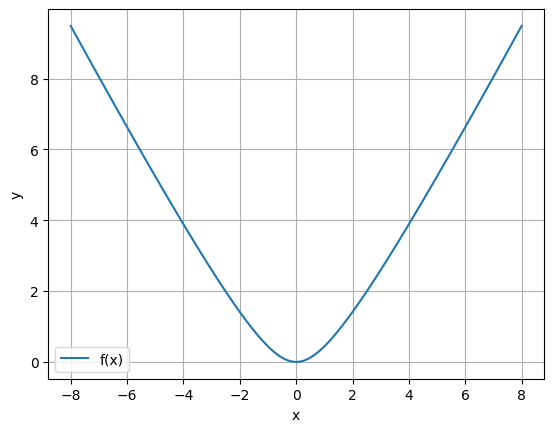

In [23]:
plot_f(func2, -8, 8)

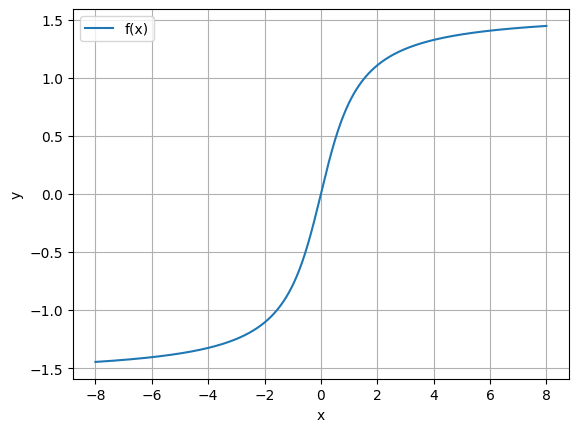

In [24]:
plot_f(func2_der1, -8, 8)

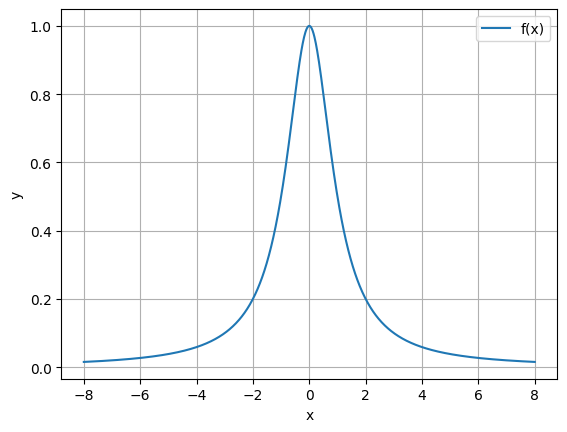

In [25]:
plot_f(func2_der2, -8, 8)

## Поиск диапазона сходимости функции для вариаций метода Ньютона

In [26]:
def newton_withtry(f, df, d2f, x0, e):
    x_last = x0
    n = 0
    
    while True:
        x = x_last - df(x_last) / d2f(x_last)

        if math.isnan(x) or math.isinf(x):
            x = x_last - df(x_last) / (d2f(x_last) + e / 1000)

        n += 2
        
        if abs(x_last - x) < e:
            break

        if (n > 100):
            break

        #if (f(x) > f(x_last)):
        #    break

        #if math.isnan(x) or math.isinf(x):
        #    break

        x_last = x
       

    return x, n

In [27]:
print('Ньютона')
t = PrettyTable(['x_min', 'x_0', 'Расчетов функции'])
x0 = -2
finish = 2
step = 0.01
while (x0 <= finish):
    x, n = newton_withtry(func2, func2_der1, func2_der2, x0, eps_global)
    t.add_row([x, x0, n])
    x0 += step
print(t)

Ньютона
+--------------------------+------------------------+------------------+
|          x_min           |          x_0           | Расчетов функции |
+--------------------------+------------------------+------------------+
| 6.9999433953175654e+168  |           -2           |        20        |
| 1.3986825899844376e+167  |         -1.99          |        20        |
|  2.701284528241848e+165  |         -1.98          |        20        |
|  5.038993782542755e+163  |         -1.97          |        20        |
|  9.07244675269078e+161   |         -1.96          |        20        |
| 1.5753799295128646e+160  |         -1.95          |        20        |
|  2.63625462316317e+158   |         -1.94          |        20        |
| 4.2479411707470965e+156  |         -1.93          |        20        |
|  6.585563498598387e+154  |         -1.92          |        20        |
| -1.5129363895392528e+306 |         -1.91          |        22        |
| -3.0990615812720273e+302 |          -1.9 

C:\Users\alexandr\AppData\Local\Temp\ipykernel_21088\289460151.py:13: RuntimeWarning: overflow encountered in scalar power
  y = 1 / (1 + x ** 2)
C:\Users\alexandr\AppData\Local\Temp\ipykernel_21088\1124669786.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  x = x_last - df(x_last) / d2f(x_last)


## Метод Маркварда

In [28]:
def markvard(df, d2f, x0, e):
    x_last = x0
    n = 0

    d2y_0 = d2f(x0)
    u = abs(d2y_0 * 10)
    
    while True:
        dy = df(x_last)
        d2y = d2f(x_last)

        x = x_last - dy / (d2y + u)
        
        n += 2
        
        if x < x_last:
            u /= 2
        else:
            u *= 2
        
        if abs(x_last - x) < e:
            break

        if (n > 1000):
            break
            
        x_last = x
        

    return x, n

In [29]:
print('Марквард')
t = PrettyTable(['x_min', 'x_0', 'Расчетов функции'])
x0 = 5
finish = 10
step = 0.1
while (x0 <= finish):
    x, n = markvard(func2_der1, func2_der2, x0, eps_global)
    t.add_row([x, x0, n])
    x0 += step
print(t)

Марквард
+-------------------------+--------------------+------------------+
|          x_min          |        x_0         | Расчетов функции |
+-------------------------+--------------------+------------------+
|  7.650347585068719e-11  |         5          |        18        |
|  6.940743623161395e-11  |        5.1         |        18        |
|  1.0869026697564089e-08 | 5.199999999999999  |        16        |
|   9.40754403537444e-09  | 5.299999999999999  |        16        |
|  7.842094979827353e-09  | 5.399999999999999  |        16        |
|  6.293357272536755e-09  | 5.499999999999998  |        16        |
|  4.847762646836791e-09  | 5.599999999999998  |        16        |
|  3.5636662087723108e-09 | 5.6999999999999975 |        16        |
|  2.4766568605714975e-09 | 5.799999999999997  |        16        |
|  1.6028362714512478e-09 | 5.899999999999997  |        16        |
|  9.407128816614631e-10  | 5.9999999999999964 |        16        |
|  4.733041920381497e-10  | 6.099999999

## Метод Ньютона-Рафсона

In [30]:
def newton_rafson(f, df, d2f, x0, e):
    x_last = x0
    n = 0
    
    while True:
        dy = df(x_last)
        d2y = d2f(x_last)

        x = x_last - dy / d2y

        if math.isnan(x) or math.isinf(x):
            x = x_last - dy / (d2y + e / 1000)

        t = (dy ** 2) / ((dy ** 2) + (df(x) ** 2))
        
        if math.isnan(t) or math.isinf(t):
            t = (dy ** 2) / ((dy ** 2) + (df(x) ** 2) + e / 1000)
        
        x = x_last - t * dy / d2y

        if math.isnan(x) or math.isinf(x):
            x = x_last - t * dy / (d2y + e / 1000)
        
        n += 4
        
        if abs(x_last - x) < e:
            break

        if (n > 100):
            break

        #if (f(x) > f(x_last)):
        #    break
            
        x_last = x
        
    return x, n

In [31]:
print('Ньютона-Равсона')
t = PrettyTable(['x_min', 'x_0', 'Расчетов функции'])
x0 = 0
finish = 20
step = 0.01
while (x0 <= finish):
    x, n = newton_rafson(func2, func2_der1, func2_der2, x0, eps_global)
    t.add_row([x, x0, n])
    x0 += step
print(t)

Ньютона-Равсона


C:\Users\alexandr\AppData\Local\Temp\ipykernel_21088\985653824.py:14: RuntimeWarning: invalid value encountered in scalar divide
  t = (dy ** 2) / ((dy ** 2) + (df(x) ** 2))
C:\Users\alexandr\AppData\Local\Temp\ipykernel_21088\289460151.py:13: RuntimeWarning: overflow encountered in scalar power
  y = 1 / (1 + x ** 2)
C:\Users\alexandr\AppData\Local\Temp\ipykernel_21088\985653824.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  x = x_last - dy / d2y
C:\Users\alexandr\AppData\Local\Temp\ipykernel_21088\985653824.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  x = x_last - t * dy / d2y
C:\Users\alexandr\AppData\Local\Temp\ipykernel_21088\985653824.py:9: RuntimeWarning: overflow encountered in scalar divide
  x = x_last - dy / d2y


+--------------------------+----------------------+------------------+
|          x_min           |         x_0          | Расчетов функции |
+--------------------------+----------------------+------------------+
|           0.0            |          0           |        4         |
|  1.9735867671025198e-19  |         0.01         |        8         |
|           0.0            |         0.02         |        12        |
|           0.0            |         0.03         |        12        |
|           0.0            |         0.04         |        12        |
|           0.0            |         0.05         |        12        |
|           0.0            | 0.060000000000000005 |        12        |
|           0.0            |         0.07         |        12        |
|           0.0            |         0.08         |        12        |
|           0.0            |         0.09         |        12        |
|           0.0            | 0.09999999999999999  |        12        |
|     

# Многомодальные функции

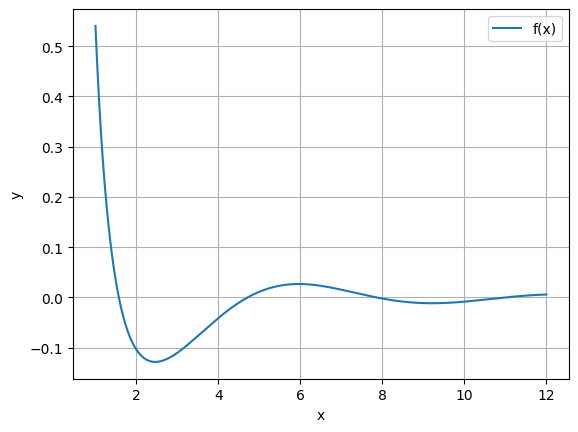

In [32]:
def f1(x):
    return np.cos(x) / (x ** 2)

f1_left = 1
f1_right = 12

plot_f(f1, f1_left, f1_right, 10000)

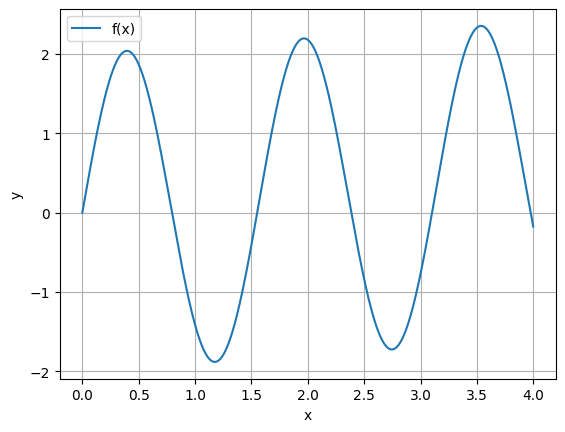

In [33]:
def f2(x):
    return 1/10 * x + 2 * np.sin(4 * x)

f2_left = 0
f2_right = 4


plot_f(f2, f2_left, f2_right, 10000)

## Метод перебора

f1:

In [34]:
if (eps_local < 1e-8):
    x_min, count = brute_force(f1, f1_left, f1_right, eps_global)
    print("Перебор fq_min(x) =", x_min, "\nnumber of calculations f =", count)

Перебор fq_min(x) = 2.45871 
number of calculations f = 1000001


f2:

In [35]:
if (eps_local < 1e-8):
    x_min, count = brute_force(f2, f2_left, f2_right, eps_global)
    print("Перебор f2_min(x) =", x_min, "\nnumber of calculations f =", count)

Перебор f2_min(x) = 1.174972 
number of calculations f = 1000001


## Метод ломаных

In [36]:
def min_p_index(pair):
    i_min = 0
    for i in range(len(pair)):
        if pair[i][1] < pair[i_min][1]:
            i_min = i
            
    return i_min

def broken_line(f, a, b, e):
    
    L = 1.4
    
    x = 1 / (2 * L) * (f(a) - f(b) + L * (a + b)) # x_0
    p = 1/2 * (f(a) + f(b) + L * (a - b)) # y_0
    
    n = 2
        
    pair = [(x, p)]

    while True:
        i = min_p_index(pair)
        min_x, min_p = pair[i]
        min_y = f(min_x)
        n += 1
    
        d = 1 / (2 * L) * (min_y - min_p)
        sigma = 2 * L * d
        
        if abs(sigma) < e:
            return min_x, n
        
        x1 = min_x - d
        x2 = min_x + d
        new_p = 1/2 * (min_y + min_p)
              
        pair.remove((min_x, min_p))
        pair.append((x1, new_p))
        pair.append((x2, new_p))

        if n > 20000:
            break
        
    return min_x, n

f1:

In [37]:
x_min, count = broken_line(f1, f1_left, f1_right, eps_global)
print("Ломанных f1_min(x) =", x_min, "\nnumber of calculations f =", count)

Ломанных f1_min(x) = 2.458712590547526 
number of calculations f = 11248


f2:

In [38]:
x_min, count = broken_line(f2, f2_left, f2_right, eps_global)
print("Ломанных f2_min(x) =", x_min, "\nnumber of calculations f =", count)

Ломанных f2_min(x) = 1.1966775794971527 
number of calculations f = 48
